In [1]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install langdetect pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Manage imports
import requests
import pandas as pd
import re
import ast
import os
from os import listdir
from os.path import isfile, join
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from langdetect import detect, DetectorFactory
DetectorFactory.seed = 0
from sklearn.feature_extraction.text import CountVectorizer

In [4]:
# Google API - Resource #1
category = "graphic novel"
# law, mythology, lore, magic, neuroscience, sustainability, climate change, innovation, data, internet, blockchain
# cryptocurrency, money, social media, media, communication, agriculture, diy, cooking, food, gardening, crafts,
# photography, survival, travel, transportation, farming, essays, health, fitness, nutrition,
# mental health, meditation, yoga, exercise, diet, ecology, genetics, oceanography, meteorology, 
# noir, contemporary romance, contemporary fiction, western, business, management, marketing, finance, accounting, 
# entrepreneurship, leadership, investing, sales, paranormal, data science, artificial intelligence
# machine learning, programming, software engineering, robotics, web development, networking, cybersecurity, electronics,
# electrical engineering, mechanical engineering, cultural studies, geography, archaeology, sociology

books = []

max_results = 40
start_index = 0

while True:
    params = {
        "q": f"subject:{category}",
        "maxResults": max_results,
        "startIndex": start_index
    }
    
    response = requests.get("https://www.googleapis.com/books/v1/volumes", params=params)
    data = response.json()
    
    items = data.get("items", [])
    if not items:
        break
    
    for item in items:
        volume = item.get("volumeInfo", {})
        search_info = item.get("searchInfo", {})
        book_info = {
            "title": volume.get("title", "N/A"),
            "authors": volume.get("authors", []),
            "publishedDate": volume.get("publishedDate", "N/A"),
            "categories": volume.get("categories", []),
            "description": volume.get("description", "N/A"),
            "averageRating": volume.get("averageRating", "N/A"),
            "textSnippet": search_info.get("textSnippet", "N/A"),
            "language": volume.get("language", "N/A"),
        }
        books.append(book_info)
    
    # get next page
    start_index += max_results

print(f"Total books collected: {len(books)}")

# determine if errors are found in call i.e. max limits per day to call
print(response.status_code, response.url)
if "error" in data:
    print(data["error"])

Total books collected: 50
200 https://www.googleapis.com/books/v1/volumes?q=subject%3Agraphic+novel&maxResults=40&startIndex=80


In [5]:
# save all work to pdf format - easy traceability
df = pd.DataFrame(books)
df.to_csv(f"../data/google cat csvs/{category}.csv", index=False)
print(f"Saved file: {category}.csv")

Saved file: graphic novel.csv


In [6]:
# load all csv files
file_list = []
# correct mapping
folder = "../data/google cat csvs/"
files = [f for f in listdir(folder) if isfile(join(folder, f))]
for file in files:
    path = os.path.join(folder, file)

    # make sure all files attempted exist
    if not os.path.exists(path):
        print(f"File not found: {file}")
        continue
        
    # format for finding path to correct folder for file location
    try:
        # if the file is not empty then append to file_list
        if os.path.getsize(path) > 0:
            df_part = pd.read_csv(path, on_bad_lines='skip')
            file_list.append(df_part)
        
        # if file is empty then send error and file empty
        else:
            print(f"Skip file with no data: {file}")
    except pd.errors.EmptyDataError:
        print(f"Error: file with no data found, {file}")
    except pd.errors.ParserError as e:
        print(f"Error parsing file {file}: {e}")
    except Exception as e:
        print(f"Unexpected error with file {file}: {e}")

# Combine all valid CSVs
if file_list:
    df = pd.concat(file_list, ignore_index=True)
    print(f"Combined files count:{len(file_list)}")

# if no file_list then send error.
else:
    print("Error: CSV files do not exist here")



Unexpected error with file .DS_Store: 'utf-8' codec can't decode byte 0x80 in position 3131: invalid start byte
Combined files count:220


In [7]:
# Save everything to csv for tracking purposes
df.to_csv("../data/total_df.csv", index=False)
print(f"Saved file: total_df.csv")

Saved file: total_df.csv


In [8]:
len(df)
# save over this file

29388

In [9]:
# Check DF
print(df.columns.tolist())
df.head()

['title', 'authors', 'publishedDate', 'categories', 'description', 'averageRating', 'textSnippet', 'language', '{']


,title,authors,publishedDate,categories,description,averageRating,textSnippet,language,{
0,The Engineer,['John Mortimer'],1976,['Engineer'],NaN,NaN,NaN,en,NaN
1,Masters of Structure,['Sutherland Lyall'],2002,['Architecture'],This book seeks to set the record straight on ...,NaN,NaN,en,NaN
2,N.G. Garin-Mikhaĭlovskiĭ v vospominanii︠a︡kh s...,[],1983,"['Authors, Russian']",NaN,NaN,NaN,ru,NaN
3,Lewis R. Heim,['Robert V Jacobs'],2019-08-20,['History'],"Lewis R. Heim was an American machinists, engi...",NaN,NaN,en,NaN
4,Indian Adventures in California and Mining in ...,['William A. Davidson'],1886,['Engineer'],"Overland emigrant to California, 1850, en rout...",NaN,NaN,en,NaN


In [10]:
# Kaggle Dataset (https://www.kaggle.com/datasets/abdallahwagih/books-dataset) - Resource #2
df_2 = pd.read_csv("../data/Books_Dataset_Abdallah_Wagih_Ibrahim.csv")
print(df_2.columns.tolist())
df_2.head()

['isbn13', 'isbn10', 'title', 'subtitle', 'authors', 'categories', 'thumbnail', 'description', 'published_year', 'average_rating', 'num_pages', 'ratings_count']


,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0


In [11]:
# Function to convert any value to list or default
def convert_value_type(val):
    # Handle missing or NaN values safely
    if val is None or (isinstance(val, float) and pd.isna(val)):
        return []
    if isinstance(val, (list, tuple)):
        return list(val)
    return [word.strip() for word in str(val).split(",") if word.strip()]


# --- Then, fix how you rebuild df_2 ---
# Don’t use df_2[...] as dict keys — use column names as strings
df_2 = pd.DataFrame({
    "title": df_2["title"].fillna("N/A") if "title" in df_2 else "N/A",
    "authors": df_2["authors"].apply(convert_value_type) if "authors" in df_2 else [],
    "categories": df_2["categories"].apply(convert_value_type) if "categories" in df_2 else [],
    "description": df_2["description"].fillna("N/A") if "description" in df_2 else "N/A",
})

df_2.head()

,title,authors,categories,description
0,Gilead,[Marilynne Robinson],[Fiction],A NOVEL THAT READERS and critics have been eag...
1,Spider's Web,[Charles Osborne;Agatha Christie],[Detective and mystery stories],A new 'Christie for Christmas' -- a full-lengt...
2,The One Tree,[Stephen R. Donaldson],[American fiction],Volume Two of Stephen Donaldson's acclaimed se...
3,Rage of angels,[Sidney Sheldon],[Fiction],"A memorable, mesmerizing heroine Jennifer -- b..."
4,The Four Loves,[Clive Staples Lewis],[Christian life],Lewis' work on the nature of love divides love...


In [12]:
# combine Kaggle and google API book lists
df_combined = pd.concat([df, df_2], ignore_index=True)

# Replace all empty values with "N/A"
df_combined = df_combined.astype(object)
df_combined.fillna("N/A", inplace=True)

df_combined.head()

,title,authors,publishedDate,categories,description,averageRating,textSnippet,language,{
0,The Engineer,['John Mortimer'],1976,['Engineer'],N/A,N/A,N/A,en,N/A
1,Masters of Structure,['Sutherland Lyall'],2002,['Architecture'],This book seeks to set the record straight on ...,N/A,N/A,en,N/A
2,N.G. Garin-Mikhaĭlovskiĭ v vospominanii︠a︡kh s...,[],1983,"['Authors, Russian']",N/A,N/A,N/A,ru,N/A
3,Lewis R. Heim,['Robert V Jacobs'],2019-08-20,['History'],"Lewis R. Heim was an American machinists, engi...",N/A,N/A,en,N/A
4,Indian Adventures in California and Mining in ...,['William A. Davidson'],1886,['Engineer'],"Overland emigrant to California, 1850, en rout...",N/A,N/A,en,N/A


In [13]:
# Kaggle Dataset(https://www.kaggle.com/datasets/mdhamani/goodreads-books-100k) - Resource #3
df_3 = pd.read_csv("../data/GoodReads_100k_books.csv")
print(df_3.columns.tolist())
df_3.head()

['author', 'bookformat', 'desc', 'genre', 'img', 'isbn', 'isbn13', 'link', 'pages', 'rating', 'reviews', 'title', 'totalratings']


,author,bookformat,desc,genre,img,isbn,isbn13,link,pages,rating,reviews,title,totalratings
0,Laurence M. Hauptman,Hardcover,Reveals that several hundred thousand Indians ...,"History,Military History,Civil War,American Hi...",https://i.gr-assets.com/images/S/compressed.ph...,002914180X,9.78E+12,https://goodreads.com/book/show/1001053.Betwee...,0,3.52,5,Between Two Fires: American Indians in the Civ...,33
1,"Charlotte Fiell,Emmanuelle Dirix",Paperback,Fashion Sourcebook - 1920s is the first book i...,"Couture,Fashion,Historical,Art,Nonfiction",https://i.gr-assets.com/images/S/compressed.ph...,1906863482,9.78E+12,https://goodreads.com/book/show/10010552-fashi...,576,4.51,6,Fashion Sourcebook 1920s,41
2,Andy Anderson,Paperback,The seminal history and analysis of the Hungar...,"Politics,History",https://i.gr-assets.com/images/S/compressed.ph...,948984147,9.78E+12,https://goodreads.com/book/show/1001077.Hungar...,124,4.15,2,Hungary 56,26
3,Carlotta R. Anderson,Hardcover,"""All-American Anarchist"" chronicles the life a...","Labor,History",https://i.gr-assets.com/images/S/compressed.ph...,814327079,9.78E+12,https://goodreads.com/book/show/1001079.All_Am...,324,3.83,1,All-American Anarchist: Joseph A. Labadie and ...,6
4,Jean Leveille,NaN,"Aujourdâ€™hui, lâ€™oiseau nous invite Ã sa ta...",NaN,https://i.gr-assets.com/images/S/compressed.ph...,2761920813,NaN,https://goodreads.com/book/show/10010880-les-o...,177,4.00,1,Les oiseaux gourmands,1


In [14]:
# Function to convert any value to list or default
def convert_na(val):
    if pd.isnull(val):
        return []
    else : return val

df_3 = pd.DataFrame({
     "title": df_3.get("title").fillna("N/A"),
    "authors": df_3.get("author").apply(convert_na),
    "categories": df_3.get("genre").apply(convert_na),
    "description": df_3.get("desc").fillna("N/A"),
    "averageRating": df_3.get("rating").fillna("N/A"),
})

print(df_3.head())

                                               title  \
0  Between Two Fires: American Indians in the Civ...   
1                           Fashion Sourcebook 1920s   
2                                         Hungary 56   
3  All-American Anarchist: Joseph A. Labadie and ...   
4                              Les oiseaux gourmands   

                            authors  \
0              Laurence M. Hauptman   
1  Charlotte Fiell,Emmanuelle Dirix   
2                     Andy Anderson   
3              Carlotta R. Anderson   
4                     Jean Leveille   

                                          categories  \
0  History,Military History,Civil War,American Hi...   
1          Couture,Fashion,Historical,Art,Nonfiction   
2                                   Politics,History   
3                                      Labor,History   
4                                                 []   

                                         description  averageRating  
0  Reveals that sever

In [15]:
df_combined = pd.concat([df_combined, df_3], ignore_index=True)

# Replace all non-values with "N/A"
df_combined = df_combined.astype(object)
df_combined.fillna("N/A", inplace=True)

print(len(df_combined))
df_combined.head()

136198


,title,authors,publishedDate,categories,description,averageRating,textSnippet,language,{
0,The Engineer,['John Mortimer'],1976,['Engineer'],N/A,N/A,N/A,en,N/A
1,Masters of Structure,['Sutherland Lyall'],2002,['Architecture'],This book seeks to set the record straight on ...,N/A,N/A,en,N/A
2,N.G. Garin-Mikhaĭlovskiĭ v vospominanii︠a︡kh s...,[],1983,"['Authors, Russian']",N/A,N/A,N/A,ru,N/A
3,Lewis R. Heim,['Robert V Jacobs'],2019-08-20,['History'],"Lewis R. Heim was an American machinists, engi...",N/A,N/A,en,N/A
4,Indian Adventures in California and Mining in ...,['William A. Davidson'],1886,['Engineer'],"Overland emigrant to California, 1850, en rout...",N/A,N/A,en,N/A


In [16]:
df_combined.to_csv("../data/total_df.csv", index=False)

In [17]:
# Load your dataset
total_df = pd.read_csv("../data/total_df.csv")

# Drop duplicates by both title and authors
df_clean = total_df.drop_duplicates(subset=["title", "authors"], keep="first")

print(f"Before removing duplicates: {len(total_df)} rows")
print(f"After removing duplicates: {len(df_clean)} rows")

Before removing duplicates: 136198 rows
After removing duplicates: 131607 rows


/var/folders/gs/rm1mjp5x5ybc93h8m4xwbfyr0000gn/T/ipykernel_43047/2028025955.py:2: DtypeWarning: Columns (2,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  total_df = pd.read_csv("../data/total_df.csv")


In [18]:
# view data
print(len(df_clean))
df_clean.head()


131607


,title,authors,publishedDate,categories,description,averageRating,textSnippet,language,{
0,The Engineer,['John Mortimer'],1976,['Engineer'],NaN,NaN,NaN,en,NaN
1,Masters of Structure,['Sutherland Lyall'],2002,['Architecture'],This book seeks to set the record straight on ...,NaN,NaN,en,NaN
2,N.G. Garin-Mikhaĭlovskiĭ v vospominanii︠a︡kh s...,[],1983,"['Authors, Russian']",NaN,NaN,NaN,ru,NaN
3,Lewis R. Heim,['Robert V Jacobs'],2019-08-20,['History'],"Lewis R. Heim was an American machinists, engi...",NaN,NaN,en,NaN
4,Indian Adventures in California and Mining in ...,['William A. Davidson'],1886,['Engineer'],"Overland emigrant to California, 1850, en rout...",NaN,NaN,en,NaN


In [19]:
# Keep English Language only books for Capstone (simplicity in reviewing)
if "languages" in df_clean.columns:
    # Filter rows where 'languages' contains 'eng'
    df_en = df_clean[df_clean["languages"].apply(lambda x: "eng" in x if isinstance(x, list) else False)]
else:
    print("'languages' column does not exist.")
    df_en = df_clean.copy()  # fallback: keep all rows

def clean_description(text):
    if not isinstance(text, str):
        return ""
    # Keep letters, numbers, spaces, and some punctuation (- . , ? !)
    cleaned = re.sub(r"[^A-Za-z0-9\s\-\.,\?!]", "", text)
    return cleaned

# Apply the function
df_clean.loc[:, 'description'] = df_clean['description'].apply(clean_description)

'languages' column does not exist.


In [20]:
# ensure that all non-English text is removed from description

def is_english(text):
    if not isinstance(text, str) or text.strip() == "":
        return False
    try:
        return detect(text) == "en"
    except:
        return False  # handles empty, short, or malformed text

# Apply language detection and keep only English rows
df_clean["is_english"] = df_clean["description"].apply(is_english)
df_clean = df_clean[df_clean["is_english"]].copy()  # avoid SettingWithCopyWarning

print(f"Remaining rows: {len(df_clean)}")

Remaining rows: 109006


/var/folders/gs/rm1mjp5x5ybc93h8m4xwbfyr0000gn/T/ipykernel_43047/189394630.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["is_english"] = df_clean["description"].apply(is_english)


In [21]:
# Normalize authors and Categories (currently list)
def normalize_list(x):
    if isinstance(x, list):
        return x
    # If NaN or empty, return ["N/A"]
    if pd.isnull(x) or x == "":
        return ["N/A"]
    # If a string that looks like a list: "[1, 2, 3]"
    try:
        parsed = ast.literal_eval(x)
        if isinstance(parsed, list):
            return parsed
    except:
        pass
    # If comma-separated string: "1,2,3"
    return [item.strip() for item in str(x).split(",")]

df_clean = df_clean.copy()  # now it’s independent
df_clean["authors"] = df_clean["authors"].apply(normalize_list)
df_clean["categories"] = df_clean["categories"].apply(normalize_list)




In [22]:
# Keep only meaningful descriptions, authors and titles (all required)
df_clean = df_clean[df_clean["title"].str.len() > 2]
df_clean = df_clean[df_clean["authors"].apply(lambda x: len(x) > 0)]  # at least 1 author
df_clean = df_clean[df_clean["description"].str.len() > 30]
df_clean = df_clean[df_clean["categories"].apply(lambda x:len(x) > 0)]  # at least 1 category

print(len(df_clean))
print(df_clean.head())

100617
                                                title                authors  \
1                                Masters of Structure     [Sutherland Lyall]   
3                                       Lewis R. Heim      [Robert V Jacobs]   
4   Indian Adventures in California and Mining in ...  [William A. Davidson]   
7   Twenty Twenty Vision: Panic in the Pandemic. N...        [Bruce Monical]   
14       The Corrected and Updated Anarchist Cookbook            [Yogi Shan]   

   publishedDate      categories  \
1           2002  [Architecture]   
3     2019-08-20       [History]   
4           1886      [Engineer]   
7           2021      [Arranger]   
14    2015-04-25     [Anarchism]   

                                          description  averageRating  \
1   This book seeks to set the record straight on ...            NaN   
3   Lewis R. Heim was an American machinists, engi...            NaN   
4   Overland emigrant to California, 1850, en rout...            NaN   
7   Twe

In [23]:
df_clean = df_clean.drop(columns=["averageRating", "is_english"])
# drop date row
df_clean.head()

,title,authors,publishedDate,categories,description,textSnippet,language,{
1,Masters of Structure,[Sutherland Lyall],2002,[Architecture],This book seeks to set the record straight on ...,NaN,en,NaN
3,Lewis R. Heim,[Robert V Jacobs],2019-08-20,[History],"Lewis R. Heim was an American machinists, engi...",NaN,en,NaN
4,Indian Adventures in California and Mining in ...,[William A. Davidson],1886,[Engineer],"Overland emigrant to California, 1850, en rout...",NaN,en,NaN
7,Twenty Twenty Vision: Panic in the Pandemic. N...,[Bruce Monical],2021,[Arranger],Twenty Twenty Vision Panic in the Pandemic is ...,NaN,en,NaN
14,The Corrected and Updated Anarchist Cookbook,[Yogi Shan],2015-04-25,[Anarchism],"Just like the title says, this is a reworking ...",NaN,en,NaN


In [24]:
df_clean["description"].describe()

count                                                100617
unique                                                99773
top       This book was converted from its physical edit...
freq                                                     58
Name: description, dtype: object

In [25]:
# Still seeing duplicates concerning descriptions - must remove description duplicate values
duplicates = df_clean["description"].duplicated()
print(f"Duplicate descriptions: {duplicates.sum()}")
# strip commas from description


df_clean["description"].value_counts().head(10)

Duplicate descriptions: 844


description
This book was converted from its physical edition to the digital format by a community of volunteers. You may find it for free on the web. Purchase of the Kindle edition includes wireless delivery.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [26]:
# remove duplicate descriptions
print(len(df_clean))
df_clean = df_clean.drop_duplicates(subset=["description"]).reset_index(drop=True)
print(len(df_clean))

100617
99773


In [27]:
# How Many Unique Categories currently?
all_categories = [cat for sublist in df_clean["categories"].dropna() for cat in sublist]
unique_categories = set(all_categories)
print(f"Unique Categories Count: {len(unique_categories)}")


Unique Categories Count: 2699


In [28]:
# Normalizing Unique Categories

# ensure that all categories have same casing
normalized_categories = {cat.lower() for cat in unique_categories}
df_clean = df_clean.dropna(subset=["categories"])
df_clean["sub_categories"] = df_clean["categories"].apply(lambda categories: [category.lower() for category in categories])
df_clean.head()

all_categories = [cat for sublist in df_clean["sub_categories"].dropna() for cat in sublist]
unique_categories = set(all_categories)
print(f"Unique Categories Count: {len(unique_categories)}")

Unique Categories Count: 2650


In [29]:
# Normalizing Unique Categories - must reduce to manageable list 

# Begin grouping categories
category_counts = df_clean["sub_categories"].value_counts().reset_index()
category_counts.columns = ["sub_categories", "count"]
print(category_counts)

                                          sub_categories  count
0                                              [fiction]   4388
1                                              [history]   1496
2                                 [business & economics]   1249
3                                     [juvenile fiction]   1024
4                            [biography & autobiography]    885
...                                                  ...    ...
66816  [lds, lds fiction, christianity, lds, young ad...      1
66817  [lds, lds fiction, christianity, lds, fantasy,...      1
66818  [reference, humanities, language, cultural, sc...      1
66819  [writing, books about books, nonfiction, histo...      1
66820  [nonfiction, history, biography, military hist...      1

[66821 rows x 2 columns]


In [30]:
# Ensure edited_category is always treated as a list
df_clean['sub_categories'] = df_clean['sub_categories'].apply(
    lambda x: x if isinstance(x, list) else [x]
)

# Add a category count column to check up list - remove later
df_clean['category_count'] = df_clean['sub_categories'].apply(len)

# Sort so books with fewer categories come first (1-category books first)
df_clean = df_clean.sort_values(by='category_count', ascending=True).reset_index(drop=True)

# Remove count column
df_clean = df_clean.drop(columns='category_count')

print(df_clean.head())

                                               title                authors  \
0                               Masters of Structure     [Sutherland Lyall]   
1  The Screwtape Letters ; With, Screwtape Propos...  [Clive Staples Lewis]   
2              The Short Stories of Ernest Hemingway     [Ernest Hemingway]   
3                      Heart Songs and Other Stories         [Annie Proulx]   
4                               The Song of Rhiannon    [Evangeline Walton]   

  publishedDate      categories  \
0          2002  [Architecture]   
1           NaN  [Christianity]   
2           NaN       [Fiction]   
3           NaN       [Fiction]   
4           NaN       [Fiction]   

                                         description  textSnippet language  \
0  This book seeks to set the record straight on ...          NaN       en   
1  One of C.S. Lewiss most imaginative creations,...          NaN      NaN   
2  Forty-nine stories reflect much of the intensi...          NaN      NaN   
3 

In [31]:
# balance the grouped categories - work with smaller number of categories in dataset
manual_mapping = {
    'science fiction': ['science fiction', 'scifi' 'star trek','star wars', 'extraterrestrial beings',  '40k', 'otherland (imaginary place)', 'fantasy/sci-fi crossover', 'sci-fi', 'space opera'],
    'classic': ['novel', 'short stories', 'literary fiction', 'adams, nick (fictitious character)','juan (fictitious character)', 'thaddeus (fictitious character)', 'fiction general'],
    'myths/fairy tales': ['mythology', 'folktale', 'legend', 'tale', 'mythological', 'folk', 'folklore', 'fairy tale retellings', 'fables', 'greek drama (tragedy)', 'fairies', 'fairy tales', 'fractured fairy tales'],
    'fantasy': ['fantasy', 'fantasy fiction','werewolves', 'vampires', 'cthulhu', 'magic', 'magik', 'wizards', 'dark fantasy', 'urban fantasy', 'dragons', 'superheroes' ],
    'thriller': ['thriller', 'crime', 'mystery', 'suspense', 'murder', 'true crime', 'outlaws', 'spy', 'fiction thriller', 'detective', 'detective and mystery stories', 'legal thriller', 'mystery and detective stories', 'paranormal mystery', 'spy thriller', 'detective', 'brennan, temperance (fictitious character)', 'cross, alex (fictitious character)', 'bourne, jason (fictitious character)','hannay, richard (fictitious character)', 'gentry, court (fictitious character)','dalziel, andrew (fictitious character)', 'jack (fictitious character)', 'dance, kathryn (fictitious character)', 'bates, norman (fictitious character)','crusoe, robinson (fictitious character)'],
    'romance': ['romance', 'first loves', 'medieval romance', 'gothic romance', 'georgian romance', 'western historical romance', 'historical romance', 'christian romance', 'steampunk romance', 'chick lit', 'romance', 'harlequin', 'love', 'passion'],
    'business/finance': ['business', 'finance', 'economics', 'money', 'wealth', 'currency', 'banking', 'banks and banking', 'investment', 'investors', 'venture capital', 'stocks', 'bonds', 'stock market', 'trading', 'cryptocurrency', 'blockchain', 'financial markets', 'economic development', 'entrepreneurship', 'startups', 'management', 'leadership', 'productivity', 'marketing', 'advertising', 'sales', 'commerce', 'retail', 'consumer behavior', 'e-commerce', 'innovation', 'globalization', 'imports', 'exports', 'foreign trade', 'budget', 'taxation', 'accounting', 'auditing', 'contracts', 'corporations', 'executives', 'chief executive officers', 'businesswomen', 'businessmen', 'entrepreneurs', 'negotiation', 'decision making', 'organizational behavior', 'econometrics', 'supply chain', 'logistics', 'management consulting', 'customer service', 'branding', 'human resources', 'employment', 'labor markets', 'job market', 'microeconomics', 'macroeconomics', 'capital', 'capitalism', 'investment strategy', 'financial planning', 'personal finance', 'budgeting', 'savings', 'debt', 'loans', 'mortgages', 'credit', 'insurance', 'risk management', 'real estate', 'property', 'market research', 'business ethics', 'corporate governance', 'innovation strategy','economic theory', 'international business', 'economic policy', 'inflation', 'recession', 'economic growth', 'entrepreneurial finance', 'digital marketing', 'consumer protection', 'advertising strategy', 'fiscal policy', 'monetary policy', 'public finance', 'economic inequality', 'investment banking'],       
    'spirituality': ['spirituality', 'meditation', 'yoga',  'exercise', 'exercise for women', 'fitness',  'meditation', 'yoga','mysticism', 'mystics', 'enlightenment', 'inner peace', 'soul','spirit', 'afterlife', 'karma', 'reincarnation', 'awakening', 'energy healing','occult', 'esoterica', 'alchemy', 'witchcraft', 'magick', 'tarot', 'astrology','crystals', 'aura', 'chakras', 'numerology', 'divination', 'clairvoyance','psychic', 'paranormal', 'ghosts', 'ghost stories', 'haunting', 'mediumship','astral projection', 'new age', 'new age movement', 'holistic', 'reiki', 'wicca','paganism', 'gnosticism', 'metaphysics', 'lucid dreaming', 'law of attraction','manifestation', 'intuition', 'good and evil', 'angels', 'archangels', 'demons','demonology', 'exorcism', 'satanism', 'blessing and cursing', 'yoga', 'zen','taoism', 'buddhist meditation', 'buddist ethics', 'meditation', 'feminist theology','immortality', 'demoniac possession'],   
    'history': ['history', 'battles of','battles', 'atomic bomb', 'world war ii', 'russian revolution', 'egyptologists', 'tu-16 badger (bomber)', 'war', 'revolution', 'civil war', 'ancient', 'armed forces','emperors', 'slaves', 'genocide',  'ardennes, battle of the, 1944-1945', 'war', 'bombings', 'soldiers','revolution', 'civilization', 'soviet', 'holocaust', 'medieval', 'history', 'war'],
    'psychology': ['psychology', 'psychiatry', 'child welfare', 'child care', 'husband and wife', 'interpersonal attraction', 'child psychologists', 'caring', 'interpersonal relations', 'girls', 'boys', 'adolescent','mental illness', 'competiton, unfair', 'how to', 'fate and fatalism', 'new thought', 'self', 'consciousness', 'personality', 'sex discrimination', 'activity programs', 'campus', 'asylums', 'families', 'behavior', 'mind', 'adult', 'gender', 'gender studies', 'feminism', 'courtship', 'social skills in children', 'emotional intelligence', 'fear', 'depression in women', 'psychology', 'grief', 'body image', 'adolescence', 'teenagers', 'children', 'parenting','friendship', 'family','sexuality', 'emotions', 'children with mental disabilities', 'womens studies', 'community life','psychiatry','psychoanalysis and religion','behavior disorders in children','mental health','child development', 'child care', 'psychopaths', 'adult child sexual abuse victims', 'child psychiatry', 'femininity', 'life change events', 'socialogy', 'queer', 'lgbt', 'gay', 'lesbian', 'gender roles', 'bisexual', 'adult child abuse victims', 'relationships', 'marriage', 'anxiety', 'contemplation','bedtime', 'adolescent', 'mothers and sons',  'ego', 'thought','depression, mental', 'clinical psychologists', 'abused wives', 'divorced women', 'bullying', 'dreams', 'adjustment', 'mothers','death','fate and fatalism', 'fathers', 'daughters','sons', 'parents','repression', 'introspection', 'motivation'],
    'religion': ['bible', 'prayer', 'biblical', 'church', 'islam', 'muslim', 'methodist', 'baptist', 'catholic', 'secularism', 'koran', 'hinduism', 'confucian', 'confucianism','humanism', 'paganism', 'shamanism', 'hinduism', 'old testament', 'new testament', 'christian', 'christianity', 'christian life', 'christian saints', 'apologetics', 'brahmanism', 'amish', 'nātha sect','copts', 'albigenses', 'mormon fundamentalism', 'taoism', 'buddhism','islam', 'mormonism', 'hinduism', 'judaism', 'philosophy', 'theology','clergy', 'holiness', 'religion', 'devotional works'],
    'technology': ['technology','engineering', 'information technology', 'computation', 'software', 'hardware', 'artificial life', 'feedback control systems', 'algorithms', 'construction projects', 'composite material', 'feedback control systems', 'atomic bomb', 'transportation', 'boatbuilding', 'electric power systems', 'cd-rom diske', 'internet','bearings', 'creep rupture strength', 'cement', 'bent beam test', 'microsoft', 'electronic circuits', '3d optical scanning', 'electric power systems', 'computers', 'computer hackers', 'androids', 'aluminum alloys', 'engineering', 'civil engineering', 'aeronautics', 'automatic test equipment', 'electricity', 'electric circuit analysis', 'electronic apparatus and appliances', 'aviation', 'tupolev 144 (jet transport)', 'access (computer file)', 'c (computer program language)', 'information retrieval', 'client/server computing', 'computer graphics', 'electronics', 'electrical engineering','phones', 'data', 'computer science', 'programming languages', 'software', 'robotics', 'c#', 'arduino', 'database management', 'artificial intelligence'],
    'education': ['education', 'educational research', 'almanacs', 'scholarship', 'role playing games', 'scholars', 'research papers', 'academic journals', 'reference books', 'instruction', 'instructional design', 'research methods', 'field guides', 'teaching', 'learning', 'school', 'schools', 'students', 'teachers','instructors', 'professors', 'lecturers', 'academia', 'academic', 'university','college', 'campus', 'boarding schools', 'elementary school', 'high school','middle school', 'graduate school', 'kindergarten', 'homeschooling', 'curriculum','syllabus', 'lesson plans', 'courses', 'classroom', 'classrooms', 'textbooks','study aids', 'study guides', 'learning materials','museums','boarding schools', 'read for school','dictionaries', 'study aids', 'encyclopedias and dictionaries', 'almanacs', 'accelerated reader', 'audiobooks', 'dictionary', 'field guides', 'school', 'assessment', 'big library read', 'literary collections', 'anthologies', 'guides', 'counseling', 'parenthood', 'academic', 'academia', 'readers', 'college', 'exam','library science', 'educational psychology', 'textbooks', 'academic writing', 'linguistics', 'research methods', 'libraries', 'education', 'teacher', 'instruction'],
    'science':['science','comets', 'microbiology', 'mineralogy', 'medical', 'hospitals', 'malnutrition', 'disease','obesity', 'health', 'nurse educators', 'childbirth','medicine', 'human physiology', 'naturopathy', 'anatomy', 'amyotrophic lateral sclerosis', 'disabilities','bacteria','physicists', 'geneticists', 'medical','genes', 'biometrics', 'circadian rhythms', 'cellulose', 'body size', 'obesity', 'fat', 'surgical intensive care', 'healing', 'aspirin', 'blood banks', 'blood', 'abdomen', 'nervous system', 'bacteriology', 'malnutrition', 'doctors', 'care of the sick','disabilities', 'metabolism', 'endocrine glands', 'hospital','nursing', 'health',  'traumatology','therapy', 'anatomy', 'physiology', 'cancer', 'amnesia', 'disease', 'fertility', 'human', 'abdominal trauma', 'autism', 'neuroscience', 'developmental genetics', 'physiotherapy','astronomers','atmosphere', 'philosophy and science','interplanetary voyages', 'mars (planet)', 'asteroids',  'physicists', 'genetics','abandoned mines', 'experimental rangelands', 'geomorphology', 'sustainability', 'environment', 'evolution', 'bioethics', 'electrons', 'civil engineering', 'aluminum alloys', 'electrons', 'polysomnography', 'amorphous silica', 'measurement', 'oceanography', 'climate change', 'ecology', 'sustainability', 'programming','astronomy', 'planetary science', 'planets', 'mechanics', 'ecology', 'cosmology', 'global warming','plants', 'dynamic meteorology', 'earth', 'fossil', 'biology', 'chemistry', 'physics', 'geology', 'astronomy', 'alchemists','astronomical instruments', 'ecology', 'zoology', 'paleontology', 'astronomy', 'physics'],
    'art': ['aesthetics', 'classical music', 'calligraphy', 'comic books, strips, etc','theater', 'comics', 'comic books', 'antiquities', 'bookbinders', 'beadwork','ballets', 'ballet dancers', 'choreography', 'knitting', 'plays','graphic','composition (art)', 'music', 'architectural design', 'painting','graphic novels', 'comic books', 'manga', 'webcomic', 'comic book adaptations', 'comic strips', 'comics & graphic novels', 'graphic novels comics manga', 'drawing','art history', 'photography', 'design', 'architecture', 'film','cinematography', 'animation', 'television', 'motion picture industry','film adaptations', 'cinema', 'animated films', 'spaghetti westerns','script', 'documentary photography', 'media', 'art'],
    'slice of life': ['cocktails', 'house & home', 'pets', 'climbing', 'cities','puzzles', 'urban planning', 'politics', 'antiques & collectibles', 'transport', 'social media', 'crafts', 'sports', 'horticulture','origami', 'sewing', 'fashion', 'quilting', 'chess', 'travel', 'crafts & hobbies', 'games', 'wine', 'alcohol', 'diets','nutrition', 'diet', 'diet therapy', 'plants', 'herbs', 'botany', 'gardening', 'gardens', 'gastronomy', 'culinary', 'pomegranate', 'candy', 'dinners and dining','coffee','vegan', 'food preservation', 'vegetarianism','farmers', 'cookbooks', 'beer',  'brewing','chocolate', 'eating customs', 'cooking (spices)', 'cookery', 'cookery (vegetables)', 'mediterranean', 'cooking', 'food writing', 'food and wine', 'cook', 'food and drink', 'tea, coffee', 'beverages', 'vegetarian', 'vegan','coffee', 'cookery', 'cooking', 'agriculture', 'farming'],
    'humanities': ['turkic languages', 'languages', 'linguists', 'literary collections', 'biographie - linguist', 'guidebook','audio-visual translation', 'actors', 'language and languages','foreign language study', 'writing', 'literary criticism', 'drama', 'dramatists', 'english', 'humanities', 'poets', 'authors', 'biography', 'autobiography', 'memoir','books', 'essay', 'writers', 'poetry', 'literature', 'english literature', 'american literature', 'french literature', 'german literature', 'italian literature', 'spanish literature', 'swedish literature', 'czech literature', 'nonfiction', 'juvenile nonfiction', 'young adult nonfiction', ],
    'general fiction': ['fiction', 'western', 'contemporary fiction','action', 'badventure', 'adventure stories', 'adventure and adventurers', 'heroes', 'thrill', 'pulp', 'action/adventure', 'weird west', 'anita (fictitious character)', 'freeman, matt (fictitious character)'],
}

# begin to sort the categories mapping above with the categories inside column edited_category to group categories
def mapping(category):
    category_text = ' '.join(category) if isinstance(category, list) else str(category)
    for key, keywords in manual_mapping.items():
        for k in keywords:
            if re.search(rf"\b{re.escape(k)}\b", category_text, re.IGNORECASE) or k.lower() in category_text.lower():
                return key
    return 'other'

df_clean['category_grouped'] = df_clean['sub_categories'].apply(mapping)
df_clean['category_grouped'] = df_clean['category_grouped'].fillna('other').astype('str')

# verify no lists remain
print(df_clean['category_grouped'].apply(type).value_counts())


# need to max out categories in order to balance data - max out at 4000
df_balanced = (
    df_clean
    .groupby('category_grouped', group_keys=False)
    .apply(lambda x: x.sample(n=min(4000, len(x)), random_state=42))
    .reset_index(drop=True)
)

# --- verify results ---
category_counts = df_balanced['category_grouped'].value_counts()
print(category_counts.head(40))
print(f"\nTotal rows after balancing: {len(df_balanced)}")

category_grouped
<class 'str'>    99773
Name: count, dtype: int64
category_grouped
art                  4000
business/finance     4000
spirituality         4000
slice of life        4000
science fiction      4000
science              4000
romance              4000
psychology           4000
thriller             4000
humanities           4000
history              4000
general fiction      4000
fantasy              4000
classic              4000
religion             3994
other                2882
myths/fairy tales    2293
education            2140
technology           1614
Name: count, dtype: int64

Total rows after balancing: 68923


/var/folders/gs/rm1mjp5x5ybc93h8m4xwbfyr0000gn/T/ipykernel_43047/1725732377.py:43: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=min(4000, len(x)), random_state=42))


In [32]:
df_clean.head()
df_balanced.head()

,title,authors,publishedDate,categories,description,textSnippet,language,{,sub_categories,category_grouped
0,Polish Music Since Szymanowski,"[Adrian Thomas, Arnold Whittall]",NaN,[Music],This book looks at Polish music since 1937 and...,NaN,NaN,NaN,[music],art
1,Happy Home: Twenty-One Sewing and Craft Projec...,[Jennifer Paganelli],NaN,"[Art, Crafts, Nonfiction, Crafts, Sewing]",Jennifer Paganelli designs one of the most pop...,NaN,NaN,NaN,"[art, crafts, nonfiction, crafts, sewing]",art
2,"The Tree Of Life, The Sun, The Goddess: Symbol...","[Mykola Soroka, Romana Labrosse, Volodymyr Gri...",NaN,"[Art, Cultural, Ukraine]",Museum exhibition catalog of traditional Ukrai...,NaN,NaN,NaN,"[art, cultural, ukraine]",art
3,Modern Patchwork: 12 Quilts to Take You Beyond...,[Elizabeth Hartman],NaN,"[Crafts, Quilting, Art, Crafts, Nonfiction, Re...",Ready for the next level of creative patchwork...,NaN,NaN,NaN,"[crafts, quilting, art, crafts, nonfiction, re...",art
4,75 Floral Blocks to Crochet: Beautiful Pattern...,[Betty Barnden],NaN,"[Art, Crafts, Nonfiction]","75 Floral Blocks to Crochet, is a charming col...",NaN,NaN,NaN,"[art, crafts, nonfiction]",art


In [33]:
# remove all rows that do not fit into the selected categories - I will only keep categories that contain balanced or close 
# to balanced amout of data for my model
# Filter categories with more than 3600 records which is 90% of 4000
valid_categories = df_balanced['category_grouped'].value_counts()
valid_categories = valid_categories[valid_categories > 3600].index

df_balanced = df_balanced[df_balanced['category_grouped'].isin(valid_categories)]



# Final Count for Dataset - number of rows to train model
print(df_balanced['category_grouped'].value_counts())
print(f"\nTotal rows after filtering: {len(df_balanced)}")

category_grouped
art                 4000
business/finance    4000
classic             4000
fantasy             4000
general fiction     4000
history             4000
humanities          4000
psychology          4000
romance             4000
science             4000
science fiction     4000
slice of life       4000
spirituality        4000
thriller            4000
religion            3994
Name: count, dtype: int64

Total rows after filtering: 59994


In [34]:
# drop all rows with less than 3600 records per category 3600/4000 is 90% 
# this should keep all categories even
valid_categories = df_balanced['category_grouped'].value_counts()
valid_categories = valid_categories[valid_categories > 3600].index

df_balanced = df_balanced[df_balanced['category_grouped'].isin(valid_categories)]



# Final Count for Dataset - number of rows to train model
print(df_balanced['category_grouped'].value_counts())
print(f"\nTotal rows after filtering: {len(df_balanced)}")

category_grouped
art                 4000
business/finance    4000
classic             4000
fantasy             4000
general fiction     4000
history             4000
humanities          4000
psychology          4000
romance             4000
science             4000
science fiction     4000
slice of life       4000
spirituality        4000
thriller            4000
religion            3994
Name: count, dtype: int64

Total rows after filtering: 59994


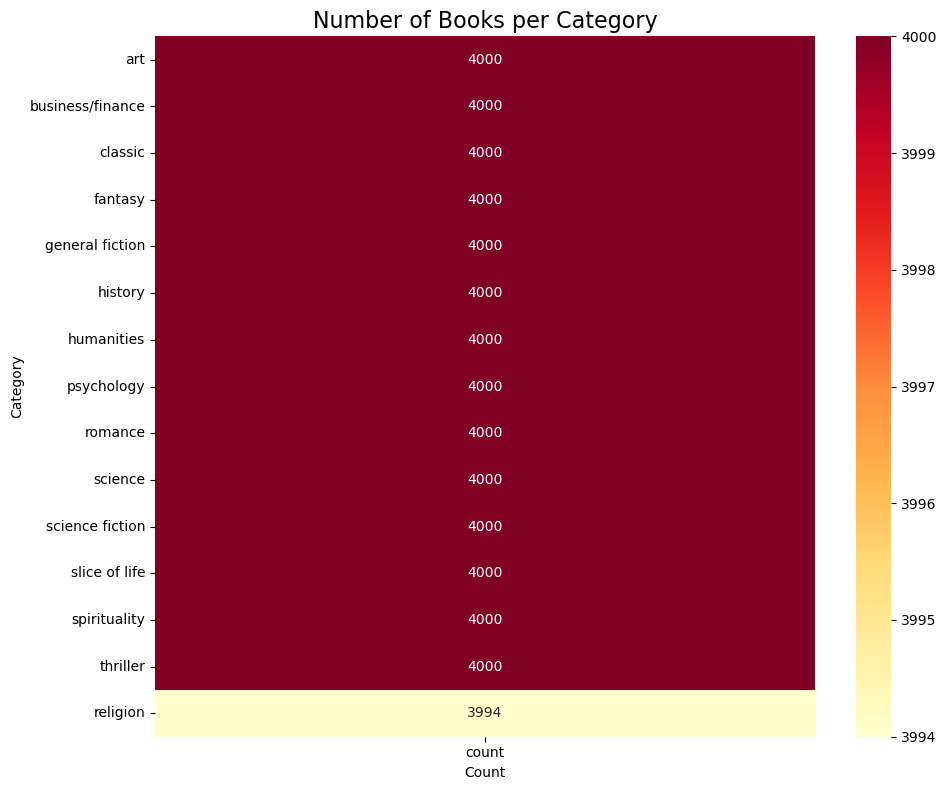

In [35]:
# do a heat map of all the current counts to see balance
heat_data = df_balanced['category_grouped'].value_counts().to_frame(name='count')

plt.figure(figsize=(10, 8))
sns.heatmap(heat_data, annot=True, fmt="d", cmap="YlOrRd")
plt.title("Number of Books per Category", fontsize=16)
plt.xlabel("Count")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

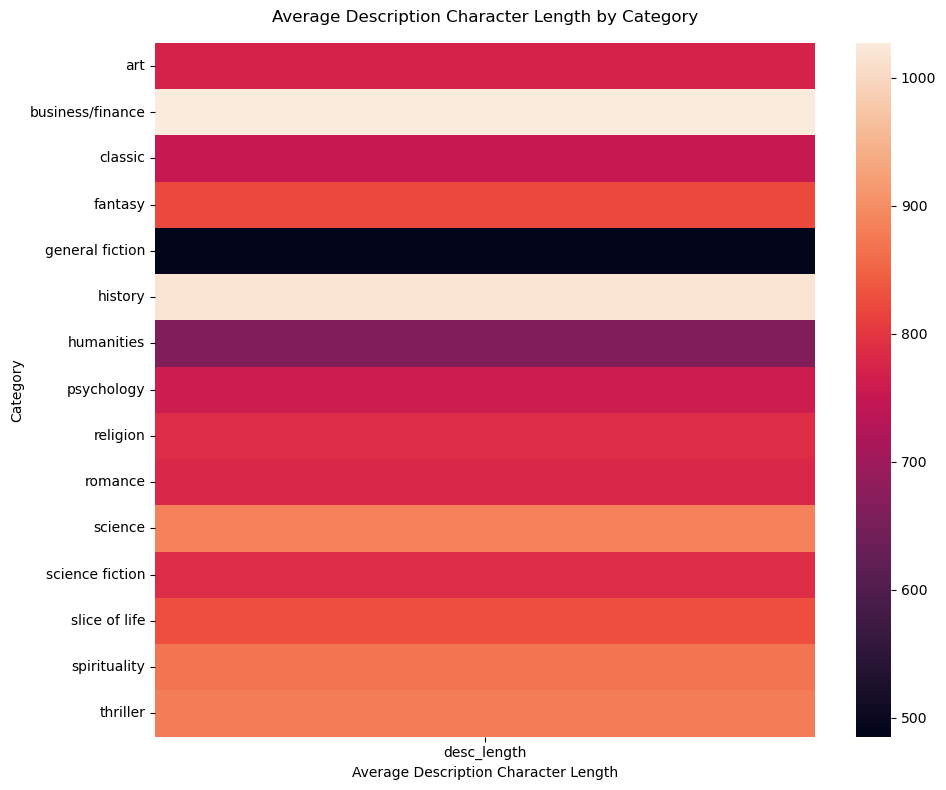

In [36]:
# do heat map concerning the categories vs. the average description character count per category
df_balanced["desc_length"] = df_balanced["description"].astype(str).apply(len)

# Compute the average description length per category
heat_data = df_balanced.groupby("category_grouped")["desc_length"].mean().to_frame()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heat_data)
plt.title("Average Description Character Length by Category",  pad=15)
plt.xlabel("Average Description Character Length")
plt.ylabel("Category")
plt.tight_layout()
plt.show()


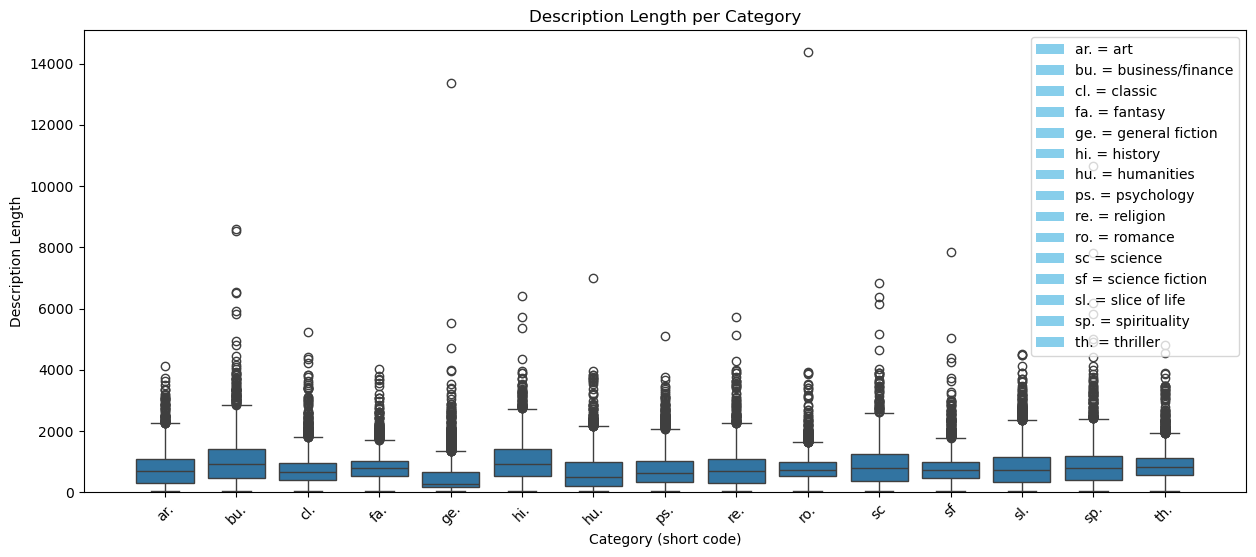

In [37]:
# box chart to visualize description length
df_balanced['category_short'] = df_balanced['category_grouped'].apply(
    lambda x: (
        'sf' if x == 'science fiction' 
        else 'sc' if x == 'science' 
        else x[:2] + '.'
    )
)

# description length
df_balanced['desc_length'] = df_balanced['description'].str.len()

# create the legend
short_mapping = df_balanced[['category_grouped', 'category_short']].drop_duplicates().set_index('category_short')['category_grouped'].to_dict()

# boxplot
plt.figure(figsize=(15,6))
sns.boxplot(data=df_balanced, x='category_short', y='desc_length')

# create legend manually using only unique short codes
for short, full in short_mapping.items():
    plt.bar(0, 0, color='skyblue', label=f"{short} = {full}")  # dummy bars for legend

plt.legend(loc='upper right', fontsize=10)
plt.xticks(rotation=45)
plt.ylabel("Description Length")
plt.xlabel("Category (short code)")
plt.title("Description Length per Category")
plt.show()

Was given guidence that should not remove outliers in description as they were representatives of real data that exist.

From above box chart we see that there are 14 major outliers in the descriptions that should be removed from the data.

2 books from business/finance, 
1 book from fantasy, 
1 book from general fiction, 
2 books from history, 
1 book from humanities, 
2 books from religion, 
1 book from romance, 
2 book from science fiction, 
2 books from spirituality


In [39]:
# remove_list = ["business/finance", "business/finance", "fantasy", "general fiction", "history", "history", "humanities", "religion", "religion","romance", "science fiction", "science fiction", "spirituality", "spirituality"]
# for re in remove_list:
#     idx_to_remove = df_balanced[df_balanced['category_grouped'] == re]['description'].str.len().idxmax()
#     df_balanced = df_balanced.drop(idx_to_remove).reset_index(drop=True)


# df_balanced['desc_length'] = df_balanced['description'].str.len()

# # Find the index of the longest description per category
# idx_max = df_balanced.groupby('category_grouped')['desc_length'].idxmax()

# # Pull the top descriptions
# top_descriptions = df_balanced.loc[idx_max, ['title','category_grouped', 'description', 'desc_length']]

# # Sort by category for readability
# top_descriptions = top_descriptions.sort_values('category_grouped').reset_index(drop=True)

# top_descriptions

In [40]:
# Remove excess rows for final version
# df_balanced = df_balanced.drop(columns=["category_short", "categories", "{", "textSnippet", "language", "publishedDate", "description_clean"])
df_balanced = df_balanced.rename(columns={'category_grouped': 'category'})

df_balanced.head()

,title,authors,publishedDate,categories,description,textSnippet,language,{,sub_categories,category,desc_length,category_short
0,Polish Music Since Szymanowski,"[Adrian Thomas, Arnold Whittall]",NaN,[Music],This book looks at Polish music since 1937 and...,NaN,NaN,NaN,[music],art,936,ar.
1,Happy Home: Twenty-One Sewing and Craft Projec...,[Jennifer Paganelli],NaN,"[Art, Crafts, Nonfiction, Crafts, Sewing]",Jennifer Paganelli designs one of the most pop...,NaN,NaN,NaN,"[art, crafts, nonfiction, crafts, sewing]",art,569,ar.
2,"The Tree Of Life, The Sun, The Goddess: Symbol...","[Mykola Soroka, Romana Labrosse, Volodymyr Gri...",NaN,"[Art, Cultural, Ukraine]",Museum exhibition catalog of traditional Ukrai...,NaN,NaN,NaN,"[art, cultural, ukraine]",art,808,ar.
3,Modern Patchwork: 12 Quilts to Take You Beyond...,[Elizabeth Hartman],NaN,"[Crafts, Quilting, Art, Crafts, Nonfiction, Re...",Ready for the next level of creative patchwork...,NaN,NaN,NaN,"[crafts, quilting, art, crafts, nonfiction, re...",art,630,ar.
4,75 Floral Blocks to Crochet: Beautiful Pattern...,[Betty Barnden],NaN,"[Art, Crafts, Nonfiction]","75 Floral Blocks to Crochet, is a charming col...",NaN,NaN,NaN,"[art, crafts, nonfiction]",art,1102,ar.


In [41]:
# What are the top 5 categories?
most_common_cat = df_balanced["category"].value_counts().head(5)
print(f"Top 5 categories: {most_common_cat}")

# What are the top 5 sub-categories?
most_common_sub = df_balanced["sub_categories"].value_counts().head(5)
print(f"Top 5 sub-categories: {most_common_sub}")

df_balanced.head()

Top 5 categories: category
art                 4000
business/finance    4000
classic             4000
fantasy             4000
general fiction     4000
Name: count, dtype: int64
Top 5 sub-categories: sub_categories
[fiction]                      2867
[business & economics]         1109
[biography & autobiography]     864
[science]                       733
[religion]                      711
Name: count, dtype: int64


,title,authors,publishedDate,categories,description,textSnippet,language,{,sub_categories,category,desc_length,category_short
0,Polish Music Since Szymanowski,"[Adrian Thomas, Arnold Whittall]",NaN,[Music],This book looks at Polish music since 1937 and...,NaN,NaN,NaN,[music],art,936,ar.
1,Happy Home: Twenty-One Sewing and Craft Projec...,[Jennifer Paganelli],NaN,"[Art, Crafts, Nonfiction, Crafts, Sewing]",Jennifer Paganelli designs one of the most pop...,NaN,NaN,NaN,"[art, crafts, nonfiction, crafts, sewing]",art,569,ar.
2,"The Tree Of Life, The Sun, The Goddess: Symbol...","[Mykola Soroka, Romana Labrosse, Volodymyr Gri...",NaN,"[Art, Cultural, Ukraine]",Museum exhibition catalog of traditional Ukrai...,NaN,NaN,NaN,"[art, cultural, ukraine]",art,808,ar.
3,Modern Patchwork: 12 Quilts to Take You Beyond...,[Elizabeth Hartman],NaN,"[Crafts, Quilting, Art, Crafts, Nonfiction, Re...",Ready for the next level of creative patchwork...,NaN,NaN,NaN,"[crafts, quilting, art, crafts, nonfiction, re...",art,630,ar.
4,75 Floral Blocks to Crochet: Beautiful Pattern...,[Betty Barnden],NaN,"[Art, Crafts, Nonfiction]","75 Floral Blocks to Crochet, is a charming col...",NaN,NaN,NaN,"[art, crafts, nonfiction]",art,1102,ar.


In [42]:
# What is the Average description length?
avg_desc = df_balanced["description"].str.len().mean()
print(f"Average Description Length: {avg_desc}")

# What was the smallest description length?
min_desc = df_balanced["description"].str.len().min()
print(f"Description Minimum Length: {min_desc}")

# What was the longest description length?
max_desc = df_balanced["description"].str.len().max()
print(f"Description Maximum Length: {max_desc}")

Average Description Length: 807.1397639763976
Description Minimum Length: 31
Description Maximum Length: 14367


In [43]:
# Save copy of cleaned csv
df_clean.to_csv("../data/books_cleaned.csv", index=False)

# Save copy of balanced data csv
df_balanced.to_csv("../data/final_data_version.csv", index=False)
print(f"Final row count: {len(df_balanced)}")

Final row count: 59994


In [44]:
print(df_balanced.info())

<class 'pandas.core.frame.DataFrame'>
Index: 59994 entries, 0 to 68922
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           59994 non-null  object 
 1   authors         59994 non-null  object 
 2   publishedDate   10454 non-null  object 
 3   categories      59994 non-null  object 
 4   description     59994 non-null  object 
 5   textSnippet     0 non-null      float64
 6   language        10046 non-null  object 
 7   {               0 non-null      object 
 8   sub_categories  59994 non-null  object 
 9   category        59994 non-null  object 
 10  desc_length     59994 non-null  int64  
 11  category_short  59994 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 6.0+ MB
None


In [45]:
print(df_balanced.sample(5))

                                                   title  \
61246  Both-And: Living the Christ-Centered Life in a...   
39802  The New Testament with the Joseph Smith Transl...   
35809  Envy Up, Scorn Down: How Status Divides Us: Ho...   
46801                            A Good Dose of Pleasure   
25212  Wilshire Boulevard: Grand Concourse of Los Ang...   

                                   authors publishedDate  \
61246             [Rich Nathan, Insoo Kim]           NaN   
39802                     [Steven J. Hite]           NaN   
35809                     [Susan T. Fiske]           NaN   
46801                           [Zuri Day]           NaN   
25212  [Kevin Roderick, J. Eric Lynxwiler]           NaN   

                                              categories  \
61246                                     [Spirituality]   
39802    [Christianity, Lds, Religion, Religion, Church]   
35809                   [Psychology, Sociology, Science]   
46801  [Romance, Romance, African Amer

In [46]:
# Implementing machine model in SkLearn to see what the most common words are in each category. 

vectorizer = CountVectorizer(
    stop_words='english',
    max_features=8000,      # can adjust based on memory
    ngram_range=(1,2)       # use unigrams + bigrams for richer context
)
categories = df_balanced['category'].unique()
print(categories)
for category in categories: 
    df_category = df_balanced[df_balanced['category'] == category]
    history = vectorizer.fit_transform(df_category['description'])

    word_counts = history.sum(axis=0).A1
    words = vectorizer.get_feature_names_out()
    sorted_indices = word_counts.argsort()[::-1]
    top_words = [words[i] for i in sorted_indices[:20]]
    print(f"Top 20 Words for category '{category}': {top_words}")


['art' 'business/finance' 'classic' 'fantasy' 'general fiction' 'history'
 'humanities' 'psychology' 'religion' 'romance' 'science'
 'science fiction' 'slice of life' 'spirituality' 'thriller']
Top 20 Words for category 'art': ['book', 'new', 'art', 'work', 'design', 'world', 'techniques', 'step', 'projects', 'life', 'history', 'music', 'including', 'artists', 'guide', 'time', 'color', 'make', 'years', 'collection']
Top 20 Words for category 'business/finance': ['book', 'new', 'business', 'world', 'people', 'life', 'work', 'time', 'financial', 'make', 'social', 'way', 'economic', 'management', 'money', 'change', 'help', 'years', 'use', 'best']
Top 20 Words for category 'classic': ['new', 'life', 'story', 'love', 'world', 'man', 'stories', 'book', 'time', 'novel', 'young', 'family', 'years', 'just', 'like', 'old', 'best', 'woman', 'collection', 'author']
Top 20 Words for category 'fantasy': ['new', 'life', 'world', 'book', 'love', 'time', 'just', 'hes', 'man', 'shes', 'magic', 'old', 'v